In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("data/cleaned_submissions.csv")
data_topics = pd.read_csv("data/data_with_topics.csv")

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_14023/162758385.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/cleaned_submissions.csv")
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_14023/162758385.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_topics = pd.read_csv("data/data_with_topics.csv")


Check number of posts in complete dataset per year

In [22]:
# Calculate the total number of posts per year from the original DataFrame
total_per_year = data.groupby('year').size().reset_index(name='total_posts_per_year')

In [23]:
total_per_year

,year,total_posts_per_year
0,2011,1400
1,2012,15956
2,2013,19872
3,2014,23734
4,2015,40541
5,2016,59424
6,2017,79365
7,2018,62029
8,2019,62416
9,2020,81554


Create dictionary of years' total posts count

In [24]:
years_count = {
    2011: 1400,
    2012: 15956,
    2013: 19872,
    2014: 23734,
    2015: 40541,
    2016: 59424,
    2017: 79365,
    2018: 62029,
    2019: 62416,
    2020: 81554,
    2021: 52101,
    2022: 38252,
    2023: 25299
}

Create new df with topics count 

In [35]:
# Assuming 'year' is the column representing the year in the original DataFrame
topics_df = data_topics.groupby(['topic', 'year']).size().reset_index(name='topic_count')

In [36]:
topics_df

,topic,year,topic_count
0,Topic 0,2011,13
1,Topic 0,2012,202
2,Topic 0,2013,281
3,Topic 0,2014,295
4,Topic 0,2015,515
...,...,...,...
215,Topic 9,2019,301
216,Topic 9,2020,567
217,Topic 9,2021,385
218,Topic 9,2022,263


Check proportion of topic per year

In [37]:
# Map the total posts per year from the dictionary
topics_df['total_posts_per_year'] = topics_df['year'].map(years_count)

# Calculate the proportion for each topic in the corresponding year
topics_df['topic_proportion_year'] = topics_df['topic_count'] / topics_df['total_posts_per_year']

In [38]:
topics_df

,topic,year,topic_count,total_posts_per_year,topic_proportion_year
0,Topic 0,2011,13,1400,0.009286
1,Topic 0,2012,202,15956,0.012660
2,Topic 0,2013,281,19872,0.014140
3,Topic 0,2014,295,23734,0.012429
4,Topic 0,2015,515,40541,0.012703
...,...,...,...,...,...
215,Topic 9,2019,301,62416,0.004822
216,Topic 9,2020,567,81554,0.006952
217,Topic 9,2021,385,52101,0.007389
218,Topic 9,2022,263,38252,0.006875


Visualize

Set labels

In [46]:
labels = {
    "Topic 0": "Hygiene and Cleaning",
    "Topic 1": "Savings",
    "Topic 2": "Telecommunications",
    "Topic 3": "Eating Behaviour",
    "Topic 5": "Sleep",
    "Topic 6": "Traffic and Road Safety",
    "Topic 7": "Restaurant and Food Ordering",
    "Topic 8": "Hair care and shaving",
    "Topic 9": "Asking and offering help",
    "Topic 11": "Communication and Conversations",
    "Topic 12": "Pets",
    "Topic 14": "Money management",
    "Topic 15": "Self-Improvement and Well-being",
    "Topic 16": "Friendships and Social Relationships",
    "Topic 17": "Debating and Argumenting",
    "Topic 18": "Career and Education",
    "Topic 19": "Email and Spam Management"
}

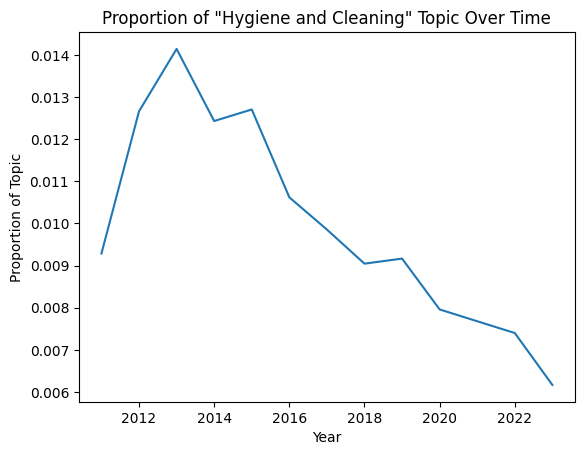

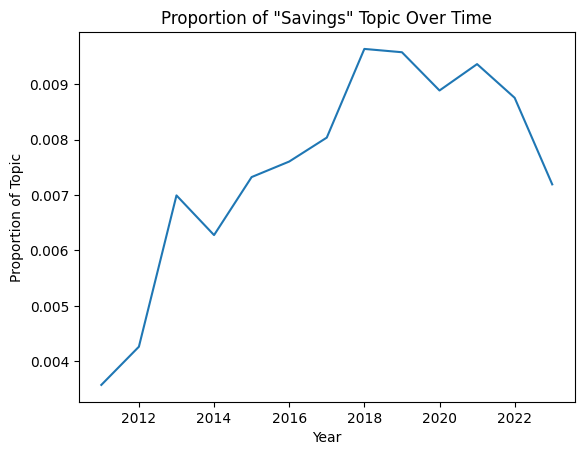

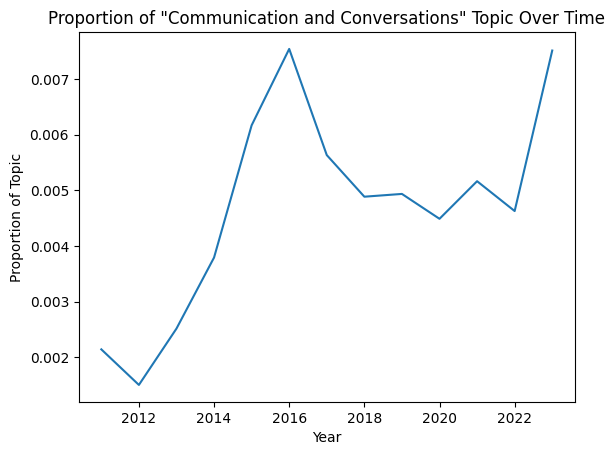

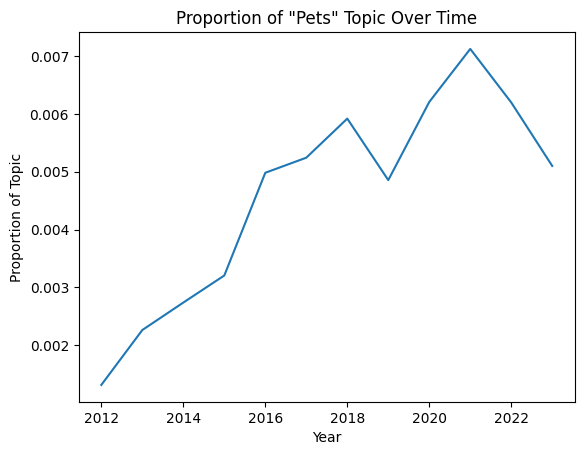

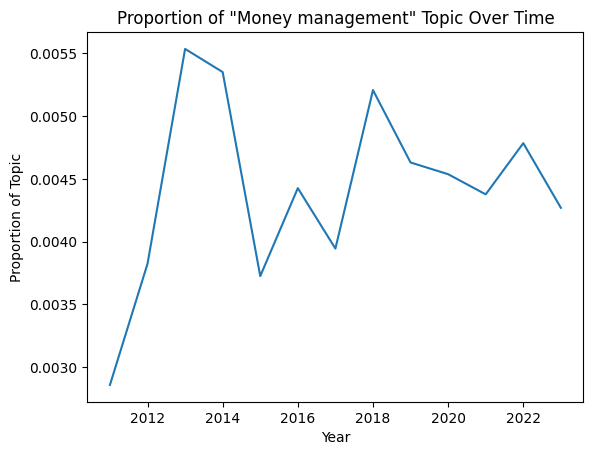

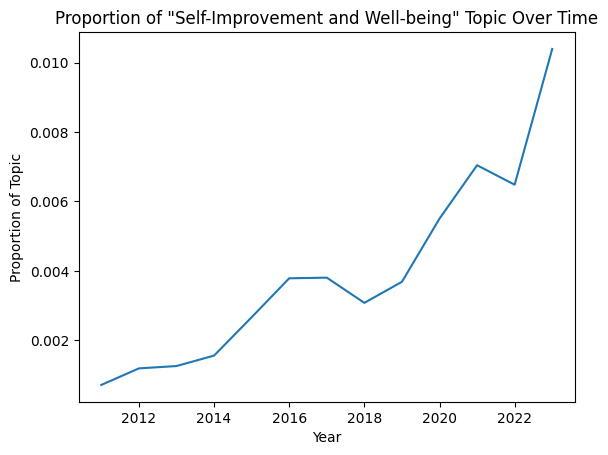

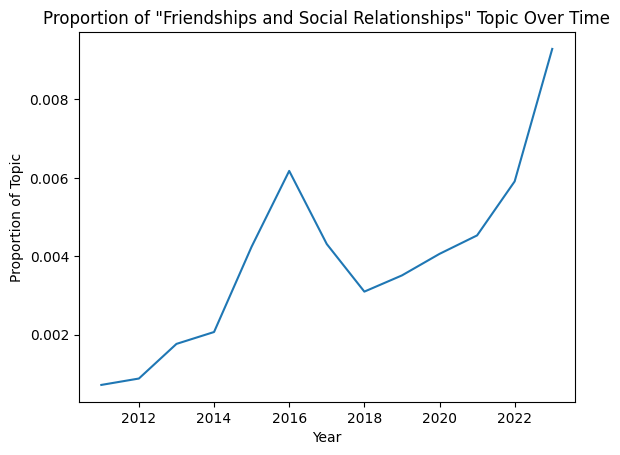

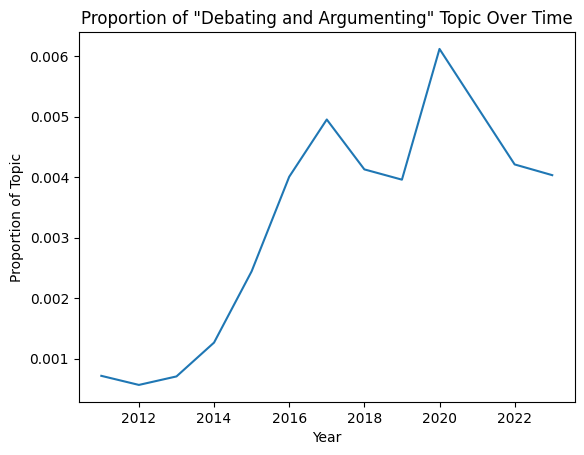

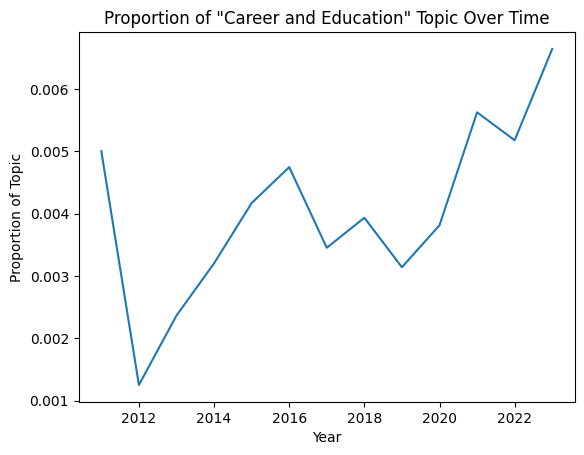

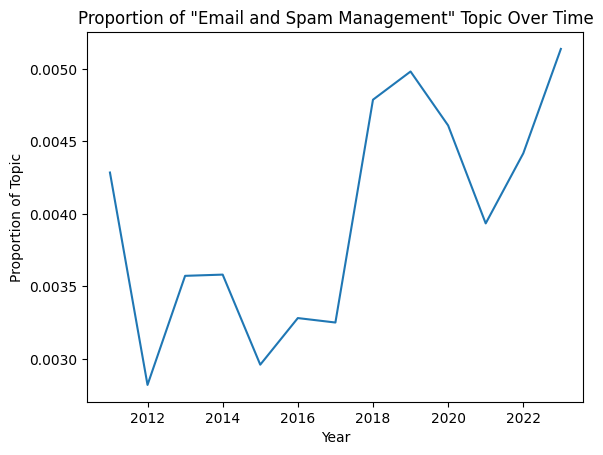

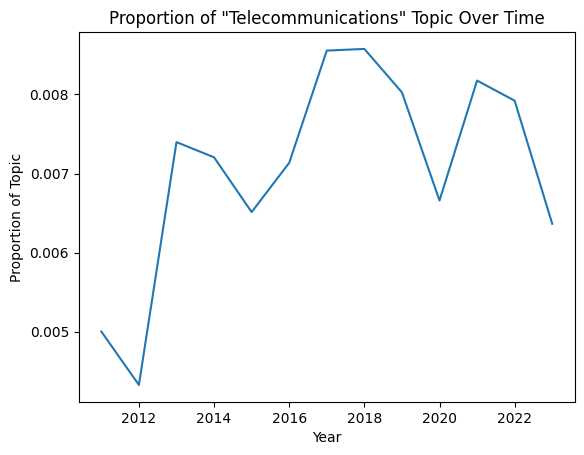

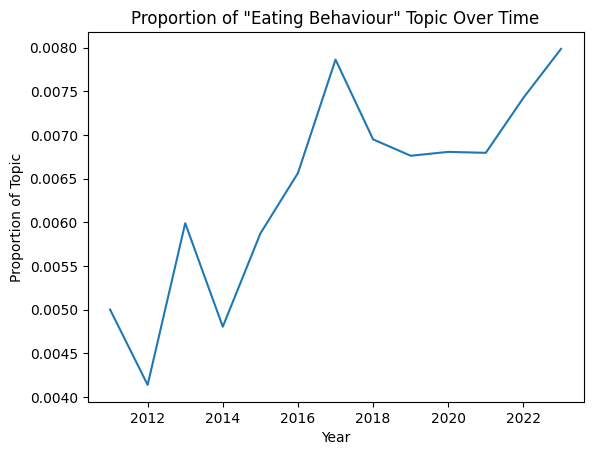

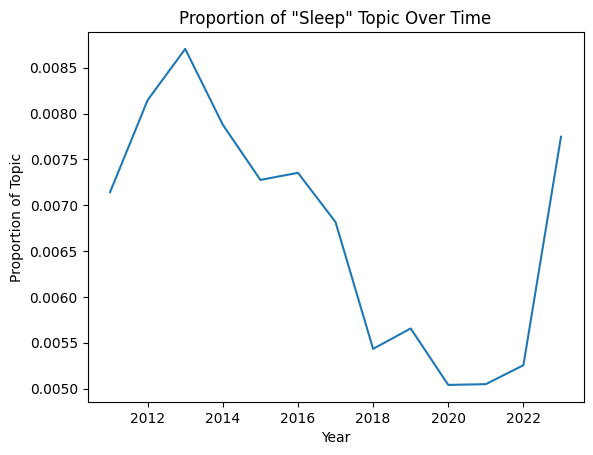

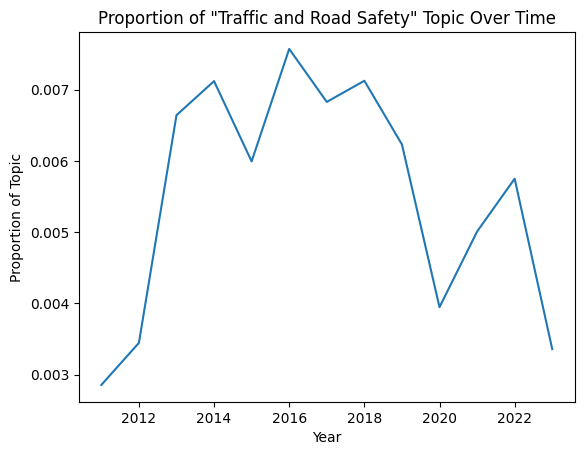

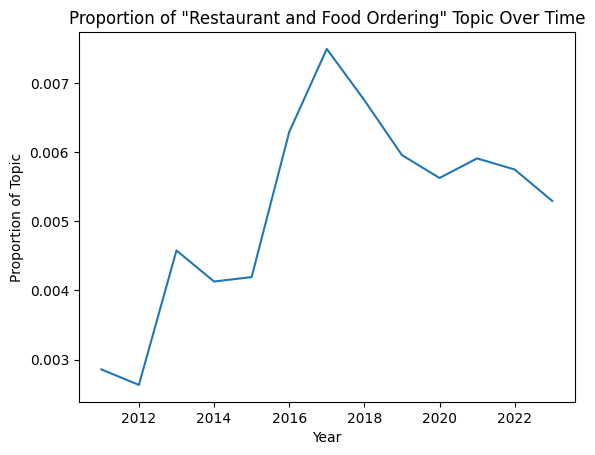

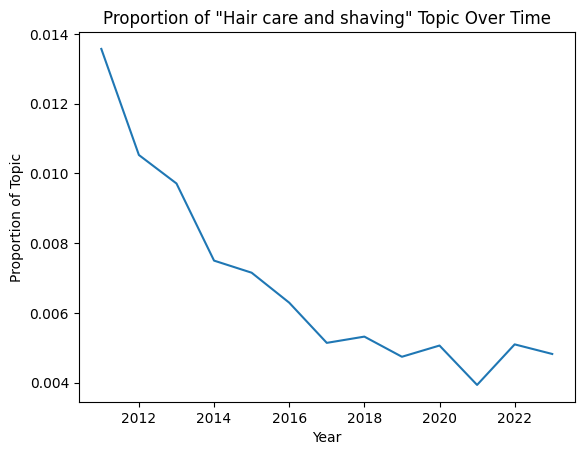

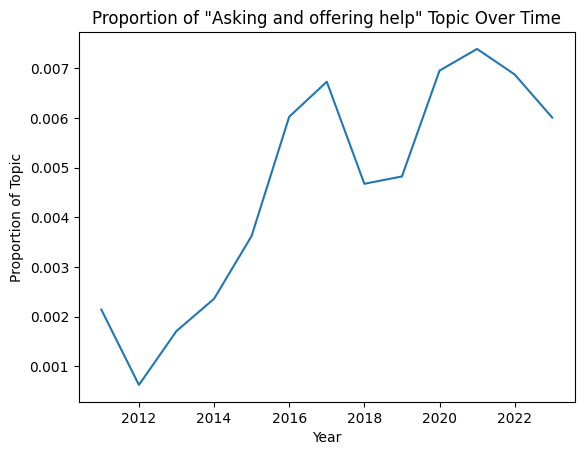

In [48]:
# Loop through each unique topic and plot its proportions over time
for topic in topics_df['topic'].unique():
    topic_data = topics_df[topics_df['topic'] == topic]
    plt.plot(topic_data['year'], topic_data['topic_proportion_year'], label=topic)
    plt.xlabel('Year')
    plt.ylabel('Proportion of Topic')
    plt.title('Proportion of "{}" Topic Over Time'.format(labels[topic]))
    plt.show()